🔍 First 5 rows:
   Transaction ID       Dates Product Category             Product Name  \
0           10001  01-01-2024      Electronics            iPhone 14 Pro   
1           10002  02-01-2024  Home Appliances         Dyson V11 Vacuum   
2           10003  03-01-2024         Clothing         Levi's 501 Jeans   
3           10004  04-01-2024            Books        The Da Vinci Code   
4           10005  05-01-2024  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America    Credit Card  
1           1      499.99         499.99         Europe         PayPal  
2           3       69.99         209.97           Asia     Debit Card  
3           4       15.99          63.96  North America    Credit Card  
4           1       89.99          89.99         Europe         PayPal  

📌 Cleaned Column Names:
Index(['transaction_id', 'dates', 'product_category', 'product_name',


<Figure size 1000x600 with 0 Axes>

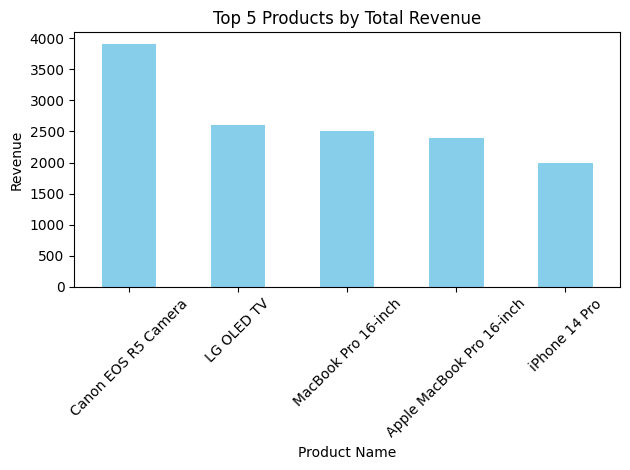

In [32]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load CSV File
df = pd.read_csv("C:/Users/PRINCE KUMAR/OneDrive/Desktop/Sales.csv")

# Step 3: Preview Data
print("🔍 First 5 rows:")
print(df.head())

# Step 4: Clean Column Names (remove spaces & lower case)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Optional: Check the cleaned columns
print("\n📌 Cleaned Column Names:")
print(df.columns)

# Step 5: Check for missing values (optional)
print("\n❓ Missing Values:")
print(df.isnull().sum())

# Step 6: Calculate Revenue (only if 'total_revenue' is missing or to recalculate it)
df['total_revenue'] = df['units_sold'] * df['unit_price']

# Step 7: Sales Summary by Product Name
product_summary = df.groupby('product_name').agg(
    total_units_sold=('units_sold', 'sum'),
    total_revenue=('total_revenue', 'sum')
).reset_index()

print("\n📦 Product-wise Sales Summary:")
print(product_summary)

# Step 8: Sales Summary by Region
region_summary = df.groupby('region').agg(
    total_units_sold=('units_sold', 'sum'),
    total_revenue=('total_revenue', 'sum')
).reset_index()

print("\n🌍 Region-wise Sales Summary:")
print(region_summary)

# Step 9: Sales Summary by Payment Method
payment_summary = df.groupby('payment_method').agg(
    total_revenue=('total_revenue', 'sum')
).reset_index()

print("\n💳 Payment Method-wise Revenue Summary:")
print(payment_summary)

# Step 10: Top 5 Products by Revenue
top_5_products = product_summary.sort_values(by='total_revenue', ascending=False).head(5)

print("\n🏆 Top 5 Products by Revenue:")
print(top_5_products)

# Step 11: Bar Chart of Top 5 Products
plt.figure(figsize=(10,6))
top_5_products.plot(kind='bar', x='product_name', y='total_revenue', legend=False, color='skyblue')
plt.title("Top 5 Products by Total Revenue")
plt.xlabel("Product Name")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("top_5_products_revenue_chart.png")
plt.show()



